# Introducing the Discrimination Threshold Visualizer
+ date: 2018-10-24 14:30
+ tags: classification, metrics, Yellowbrick
+ status: published
+ summary: Experimenting with one of Yellowbrick's newest visualizers, `DiscriminationThreshold`.

### Why are we here? What's the `DiscriminationThreshold` visualizer all about?
Recently, I've been creating new notebooks for [Yellowbrick](http://www.scikit-yb.org/en/latest/index.html) that are more in-depth than our more general [Quick Start guide](http://www.scikit-yb.org/en/latest/quickstart.html). I've completed the walk-through of the [regression]({filename}/articles/regression-notebook.ipynb) and [clustering]({filename}/articles/clustering-notebook.ipynb) notebooks and am now working on our classification visualizers. 

This is the first chance I've had to play around with one of our newest visualizers, `DiscriminationThreshold`, so I wanted to practice using it with a dataset I'm already familiar with and to try explaining the results.

First, a quick overview&mdash;this visualizer only works with binary classifiers and displays the model's precision, recall, f1 score, and queue rate with respect to the discrimination threshold, i.e., the probability or score at which the positive class is selected over the negative class. By default, the threshold is generally set to 0.5 (50%); however, it can be adjusted to increase or decrease the model's sensitivity to false positives or to take into account other factors.

One common real-world use case is that thresholding can be used by companies to detect fraud. For instance, a manager may decide that credit card applications with a score greater than 0.8 should be referred to the company's fraud department for further review. And it may be that the manager would prefer to investigate applications with a score of 0.6 and higher, but they also have to take into account the capacity of their fraud department (the number of employees, the length of time for each review). 

#### Precision! No wait, Recall!
The reasons for adjusting the threshold depend on what you're trying to accomplish with your model, which I think also makes it useful for understanding the inverse relationship between precision and recall. When I first began studying machine learning, I kept mixing them up and needed to go back to my notes to recall (pun intended) which was which; however, I've found it helpful to remember them in regards to a couple of datasets that I've encountered quite frequently in school and online tutorials.

The first example where I'd really want to focus on maximizing recall is when working with the [mushroom dataset](https://archive.ics.uci.edu/ml/datasets/mushroom), which utilizes physical characteristics to predict whether a mushroom is poisonous or edible. In selecting a model to determine which mushrooms to cook with dinner, I want the model with the highest recall, which corresponds to a low false negative rate. I'm willing to accept that a lot of the mushrooms I'll throw out are not poisonous (false positives) because of the high cost of eating a poisonous mushroom (false negatives). (Of course, in the real world, my model would have a perfect recall score of 1, since I'd label them all as the positive class and promptly throw them all out, but that's not really helpful here.)

Now in contrast to the mushroom dataset example, if I am building a model to predict whether an email is spam, suddenly the cost of a false negative is not too concerning to me. While annoying, a spam email in my inbox is certainly not on par with eating a poisonous mushroom. Instead, what would concern me more in this example is missing an important email because it was misclassified as spam (false positive). So in this case, I might want to select a model with a higher precision score.

#### Spam, spam, spam spam! Lovely spam!
*I'm using Python, so I'm allowed all the Monty Python jokes my heart desires!*

Since thresholding can be useful in the detection of spam, I'll start by using the `DiscriminationThreshold` visualizer with the [spam dataset](https://archive.ics.uci.edu/ml/datasets/spambase) from the UCI Machine Learning Repository. Yellowbrick provides several datasets wrangled from the UCI Machine Learning Repository, including the `spam` dataset, which is well-suited for binary classification. It contains 4,600 instances and 57 attributes. The target variable contains a 0 if the email was not spam (negative class) and 1 if it was spam (positive class). The majority of the attributes indicate whether a particular word or character was present in the email.

In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.datasets import load_spam

mpl.rcParams["figure.figsize"] = (9,6)

In [3]:
# Use Yellowbrick to load the spam dataset
data = load_spam()

# Load the data into a Pandas DataFrame
df = pd.DataFrame(data)

# Extract the instances and target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Now, let's see what we've got! For a given threshold along the x-axis, we can see the resulting queue rate, precision, recall, and F1 scores expressed as percentages against the y-axis. So if we decided to set the threshold for our spam filter at 0.6, this would result in all spam emails with a score above 0.6 being filtered into our spam folder (or referred to the fraud department in our other example).

We can see in the plot that setting the threshold at this level would result in a queue rate between ~34% and ~38%, with a median value of ~36%. So using the median value, if we receive 100 emails, 36 of them would wind in up in our spam folder.

The precision score falls between ~90% and ~94%, with a median score of ~92%. So of the emails identified as spam, ~92% would actually be spam (true positives) and ~8% would be incorrectly identified as spam (false positives). Our recall score would fall between ~86% and ~90%, with a median score of ~88%. So of all the actual spam emails (positive class) we receive, we'll catch ~88% with our model. 

The F1 score, which is the harmonic mean of recall and precision, ranges between ~90% and ~94%. The optimal F1 score is also shown on the plot as a vertical dashed line, which is annotated as a threshhold of ~0.43.

The reason that we have a range of values is because the `DiscriminationThreshold` visualizer accounts for variability in the model by running multiple trials using different train and test splits of the data. The variability is displayed using a band from the 10th to 90th percentile and the median score as a darker line down the middle.

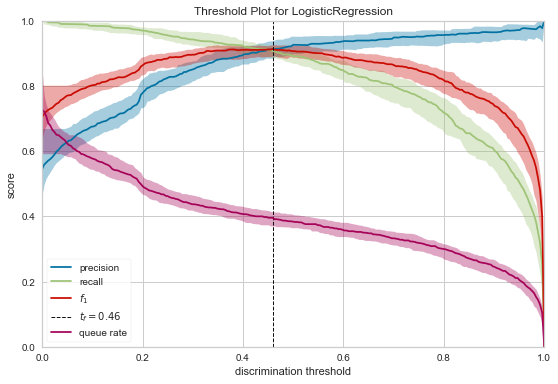

In [4]:
# Instantiate the classification model and visualizer
model = LogisticRegression()
visualizer = DiscriminationThreshold(model, classes=['not_spam', 'is_spam'], random_state=42)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.poof()           # Draw/show/poof the data

So that's it for now, but there are several ways to customize the `DiscriminationThreshold` visualizer, so that's what I'd like to try next!